In [1]:
# PANDAS & DATETIME
import pandas as pd
from datetime import datetime,timedelta

# NUMPY
import numpy as np

# PLOT LIBRARIES
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# STATSMODEL
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# SCIPY
import scipy.stats as stats
from scipy.integrate import trapz

#SKLEARN FOR PREPROCESSING
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# METRICS
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# IMBALANCE LEARN FOR PREPROCESSING
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler

# SKLEARN FOR MODEL TRAIN
from sklearn.model_selection import RandomizedSearchCV

# MODEL:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
# Import datasets
applicants = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

<span style="background-color: #007ACC; color: white; padding: 5px 10px; font-size: 62px;">DATA VISUALIZATION</span>

> # Start with *<span style="color:red">Binary Variables</span>* analysis

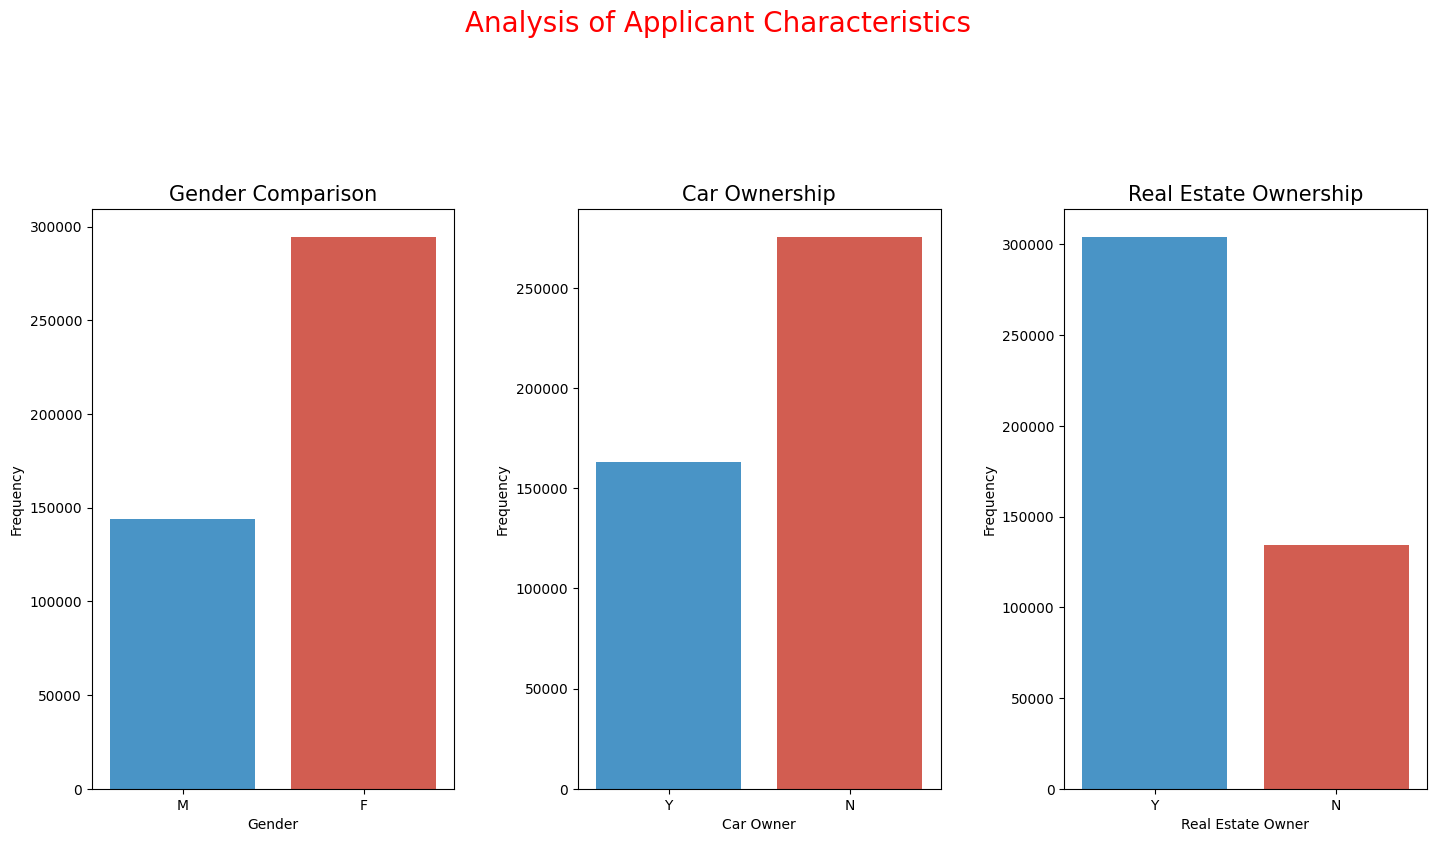

In [3]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# Set a custom color palette
custom_palette = sns.color_palette(["#3498db", "#e74c3c"])

# Set the main title with more spacing
fig.suptitle('Analysis of Applicant Characteristics', size=20, color='r', y=1.08)

# Plot gender comparison
sns.countplot(data=applicants, x='CODE_GENDER', ax=axes[0], palette=custom_palette)
axes[0].set_title('Gender Comparison', fontsize=15)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')

# Plot car ownership
sns.countplot(data=applicants, x='FLAG_OWN_CAR', ax=axes[1], palette=custom_palette)
axes[1].set_title('Car Ownership', fontsize=15)
axes[1].set_xlabel('Car Owner')
axes[1].set_ylabel('Frequency')

# Plot real estate ownership
sns.countplot(data=applicants, x='FLAG_OWN_REALTY', ax=axes[2], palette=custom_palette)
axes[2].set_title('Real Estate Ownership', fontsize=15)
axes[2].set_xlabel('Real Estate Owner')
axes[2].set_ylabel('Frequency')

# Add some extra space between subplots
plt.tight_layout(pad=3)

# Show the plot
plt.show()

# Analysis of Applicant Characteristics

In this analysis, we explore key characteristics of applicants to gain insights into their demographic and ownership profiles. We focus on three variables: 'Gender Comparison,' 'Car Owner,' and 'Real Estate Owner.' Let's delve into the findings:

## Gender Comparison

The 'Gender Comparison' plot illustrates the gender distribution among applicants. We observe the following:

- There is a **significant disparity** between the number of male and female applicants.
- The number of female applicants is **approximately twice** that of male applicants.

## Car Owner

The 'Car Owner' plot provides insights into car ownership among applicants:

- A **substantial portion** of applicants do not own a car.
- The frequency of applicants who own a car is comparatively lower, implying that a significant portion of applicants **lacks vehicle ownership**.

## Real Estate Owner

The 'Real Estate Owner' plot examines the ownership of real estate properties:

- **Most applicants are real estate owners.**
- The frequency of applicants who own real estate is higher, indicating that a majority of applicants **have investments in real estate**.

## Overall Observations

A standout observation from this analysis is the **significant gender disparity** among applicants, with a notably higher number of female applicants. Additionally, the majority of applicants **own real estate properties**, while a substantial portion **does not own a car**.

These findings provide valuable insights into the demographic and ownership characteristics of the applicant pool, which can inform further analyses and decision-making processes.


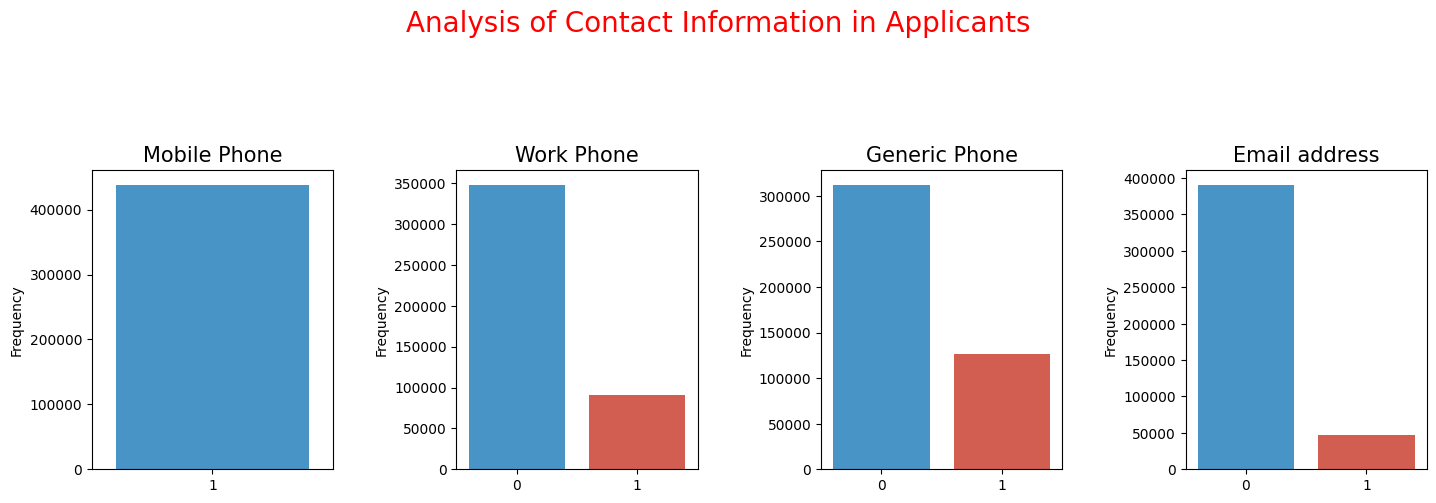

In [4]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Set a custom color palette
custom_palette = sns.color_palette(["#3498db", "#e74c3c"])

# Set the main title with more spacing
fig.suptitle('Analysis of Contact Information in Applicants', size=20, color='r', y=1.05)

# Plot mobile phone
sns.countplot(data=applicants, x='FLAG_MOBIL', ax=axes[0], palette=custom_palette)
axes[0].set_title('Mobile Phone', fontsize=15)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

# Plot work phone
sns.countplot(data=applicants, x='FLAG_WORK_PHONE', ax=axes[1], palette=custom_palette)
axes[1].set_title('Work Phone', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')

# Plot generic phone
sns.countplot(data=applicants, x='FLAG_PHONE', ax=axes[2], palette=custom_palette)
axes[2].set_title('Generic Phone', fontsize=15)
axes[2].set_xlabel('')
axes[2].set_ylabel('Frequency')

# Plot email address
sns.countplot(data=applicants, x='FLAG_EMAIL', ax=axes[3], palette=custom_palette)
axes[3].set_title('Email address', fontsize=15)
axes[3].set_xlabel('')
axes[3].set_ylabel('Frequency')

# Add some extra space between subplots
plt.tight_layout(pad=3)

# Show the plot
plt.show()

# Analysis of Contact Information in Applicants

In this analysis, we examine the contact information of applicants to gain insights into their communication methods. Specifically, we explore four binary variables related to contact information: Mobile Phone, Work Phone, Generic Phone, and Email Address.

## Key Findings

### 1. Mobile Phone

- **Observation**: 
  - Every applicant seems to possess at least one mobile phone, indicating universal mobile phone ownership among applicants.

### 2. Work Phone

- **Observations**:
  - A smaller proportion of applicants have a work phone.
  - The frequency of applicants with a work phone is relatively lower compared to those without.

### 3. Generic Phone

- **Observations**:
  - The 'Generic Phone' category suggests whether applicants have any phone other than a mobile or work phone.
  - The frequency of applicants with a generic phone is intermediate, indicating that some applicants have additional phone lines or devices.

### 4. Email Address

- **Observations**:
  - The 'Email Address' category represents whether applicants have provided an email address.
  - The majority of applicants have provided an email address.
  - The frequency of applicants with an email address is significantly higher than those without, suggesting that email communication is prevalent among applicants.
